In [2]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [15]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
EPOCHS = 20
CHANNELS = 3

In [6]:
train_datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True, rotation_range=10)
train_generator = train_datagen.flow_from_directory('C:\\Users\\amirh\\OneDrive\\Desktop\\Projects\\Project1\\Data\\dataset\\train',
                                                    target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                                    batch_size=BATCH_SIZE,
                                                    class_mode='sparse')

Found 1506 images belonging to 3 classes.


In [7]:
val_datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True, rotation_range=10)
val_generator = val_datagen.flow_from_directory('C:\\Users\\amirh\\OneDrive\\Desktop\\Projects\\Project1\\Data\\dataset\\val',
                                                    target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                                    batch_size=BATCH_SIZE,
                                                    class_mode='sparse')

Found 215 images belonging to 3 classes.


In [8]:
test_datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True, rotation_range=10)
test_generator = test_datagen.flow_from_directory('C:\\Users\\amirh\\OneDrive\\Desktop\\Projects\\Project1\\Data\\dataset\\test',
                                                    target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                                    batch_size=BATCH_SIZE,
                                                    class_mode='sparse')

Found 431 images belonging to 3 classes.


In [10]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    layers.InputLayer(input_shape = input_shape),
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)), 
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 30, 30, 64)       

In [12]:
model.compile(
    optimizer='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics = ['accuracy'])

In [13]:
1506/32

47.0625

In [14]:
215/32

6.71875

In [17]:
history = model.fit(
    train_generator, steps_per_epoch=47, epochs = EPOCHS, batch_size=BATCH_SIZE, verbose=1, validation_data=val_generator,
    validation_steps=6)

Epoch 1/20


47/47 [==============================] - 75s 2s/step - loss: 0.9162 - accuracy: 0.4727 - val_loss: 0.8930 - val_accuracy: 0.6615
Epoch 2/20
47/47 [==============================] - 68s 1s/step - loss: 0.8387 - accuracy: 0.5583 - val_loss: 0.7317 - val_accuracy: 0.7500
Epoch 3/20
47/47 [==============================] - 72s 2s/step - loss: 0.6060 - accuracy: 0.7313 - val_loss: 0.4638 - val_accuracy: 0.8073
Epoch 4/20
47/47 [==============================] - 64s 1s/step - loss: 0.3845 - accuracy: 0.8446 - val_loss: 0.4640 - val_accuracy: 0.8281
Epoch 5/20
47/47 [==============================] - 73s 2s/step - loss: 0.3117 - accuracy: 0.8765 - val_loss: 0.2752 - val_accuracy: 0.8906
Epoch 6/20
47/47 [==============================] - 69s 1s/step - loss: 0.2309 - accuracy: 0.9091 - val_loss: 0.2624 - val_accuracy: 0.9115
Epoch 7/20
47/47 [==============================] - 73s 2s/step - loss: 0.1853 - accuracy: 0.9308 - val_loss: 0.3533 - val_accuracy: 0.8490
Epoch 8/20
47/47 [

In [18]:
scores = model.evaluate(test_generator)

14/14 [==============================] - 13s 895ms/step - loss: 0.1759 - accuracy: 0.9397


In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Loss')

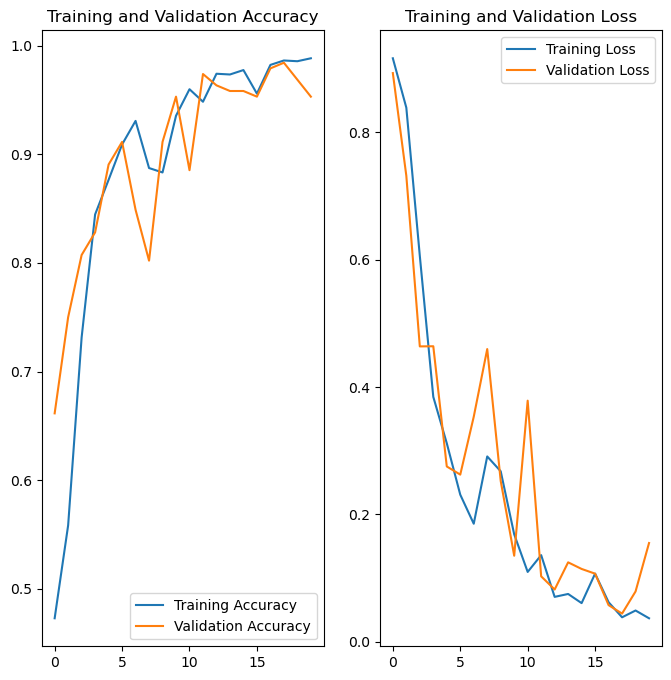

In [20]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label = 'Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label = 'Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS), loss, label = 'Training Loss')
plt.plot(range(EPOCHS), val_loss, label = 'Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

In [36]:
class_names = ['Early Blight', 'Late Blight', 'Healthy']

In [34]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)
    
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = np.max(predictions) * 100
    return predicted_class, confidence


1/1 [==============================] - 0s 68ms/step


KeyboardInterrupt: 

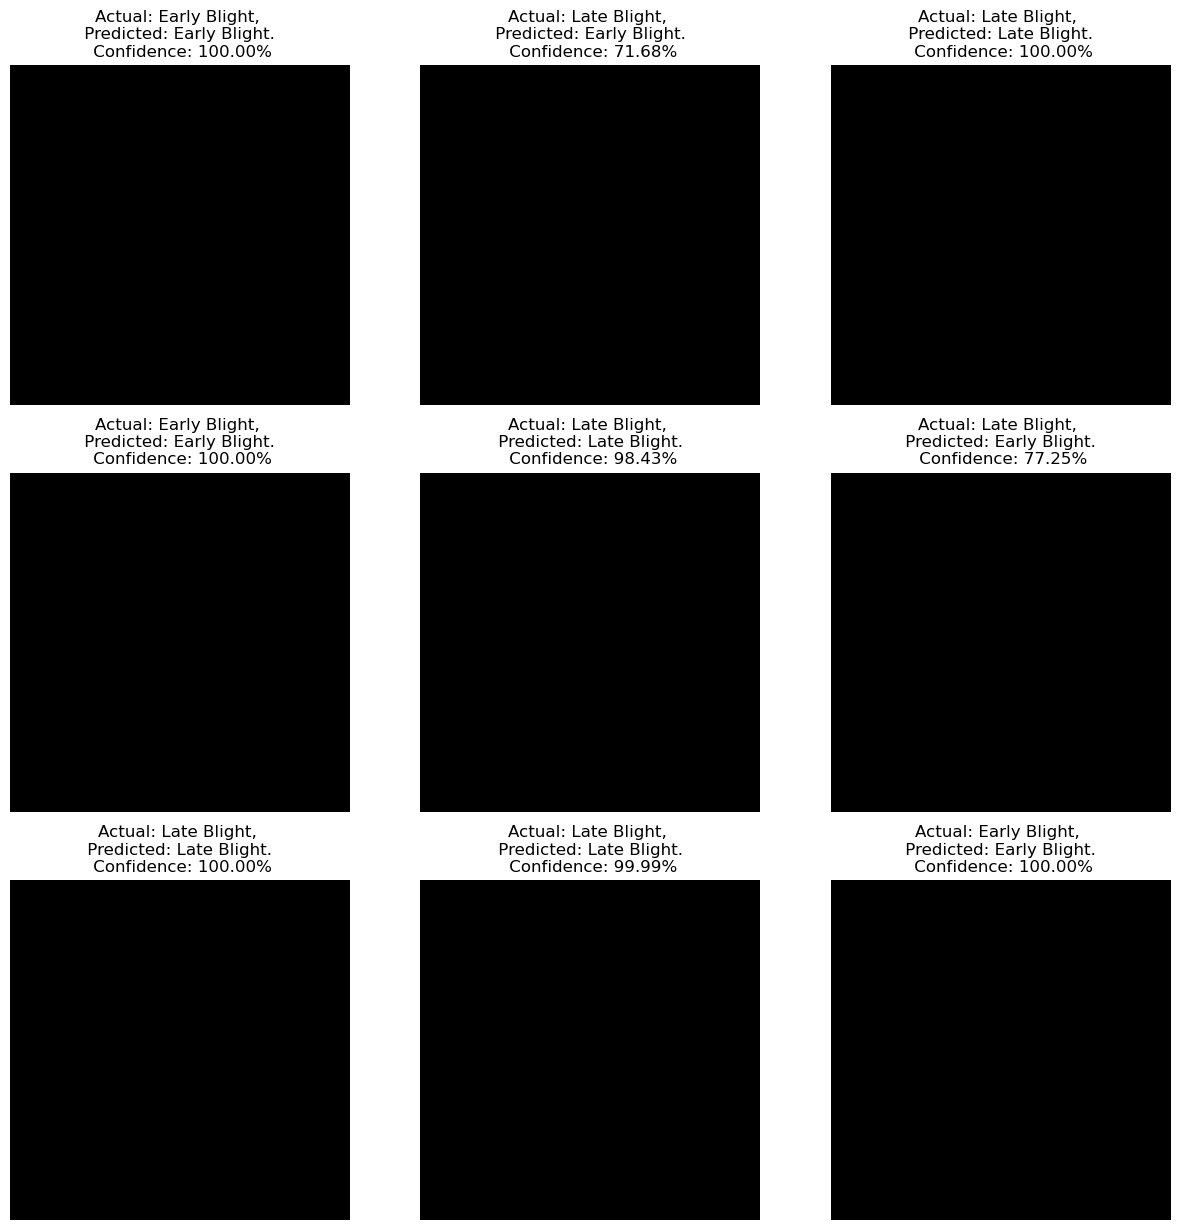

In [35]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].astype('uint8'))
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])]
        plt.title(f'Actual: {actual_class}, \n Predicted: {predicted_class}. \n Confidence: {confidence:.2f}%')
        plt.axis('off')


In [37]:
model.save(r"C:/Users/amirh/OneDrive/Desktop/Projects/Project1/leaf.h5")

C:\Users\amirh\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
